# Stock Sentiment Analysis Project

## Gathering the Article Data for our Stocks
Utilizing the News API service, we gather articles referencing the Stock Symbols that we are interested in. We take the JSON data returned, clean it, and store into our sqlite database for future reference.

In [ ]:
import sys
from news_finders import content_scraper
from news_finders import newsApi
from utils import file_utils
from utils import sqlite_utils
from datetime import datetime, timedelta
  

STOCKS = ["AAPL", "ABBV", "TXN"]


date= datetime.today() - timedelta(days=28)

reformatedDate= str(date.month) + "-" + str(date.day) + "-" + str(date.year)


articles = []
articles = newsApi.getArticlesForMultipleStocks(STOCKS, reformatedDate)



conn= sqlite_utils._createConnection(r"/var/stockSA/stockSentiment.db")

if conn is None: 
    print("Failed to open database connection")
    sys.exit(1)

sqlite_utils.insertStockArticles(conn, articles)
print(sqlite_utils._findStockArticlesForSymbol(conn, "AAPL")[0])

## Gathering the Historical Price Data for our Stocks
Utilizing the Yahoo Financials API, we gather stock finance data per each company that we are interested in and store that data in a Stock Pricing Database. 

In [ ]:
import sys
from yahoofinancials import YahooFinancials
from utils import file_utils
from utils import sqlite_utils
from datetime import datetime, timedelta


# connecting to the database
conn = sqlite_utils._createConnection(r"/var/stockSA/stockPricing.db")
if conn is None:
    print("Failed to open database connection")
    sys.exit(1)
sqlite_utils._createStockPricingTable(conn)

while True :
    ticker = input('Enter a stock symbol or to quit program, type quit: ')
    if ticker == 'quit' :
        quit()

    try: 
        yahoo_financials = YahooFinancials(ticker) 
        # call to the YahooFinance tool function
        historicalStockPrices = yahoo_financials.get_historical_price_data(
                "2020-06-09", "2020-07-08", "daily")
        
        # creating our variable prices, storing all of the data in a list
        if historicalStockPrices[ticker] is None:
            print('Failed to get stock prices')
            continue
        
        prices = historicalStockPrices[ticker]['prices']
        sqlite_utils.insertPrices(conn, ticker, prices)	

    except Exception as e: 
    	print("Invalid StockSymbol, no data ", e)
    	continue
    
    print(prices)

### Pulling Data from stockSentiment database

In [ ]:
import sys
import pandas as pd
from utils import file_utils
from utils import sqlite_utils


conn= sqlite_utils._createConnection(r"/var/stockSA/stockSentiment.db")

if conn is None: 
    print("Failed to open database connection")
    sys.exit(1)

#print(sqlite_utils._findStockArticlesForSymbol(conn, "AAPL")[0])
    
#print(sqlite_utils._findAllStockArticlesBetweenDates(conn, "2020-03-09", "2020-11-14", "AAPL"))

dataFrame = pd.read_sql_query('SELECT * FROM stockArticles WHERE date >= "2020-03-16" AND date <= "2020-11-14" AND stockSymbol="AAPL" ORDER BY date DESC', conn)
dataFrame

### Pulling Stock Price Data from Database

[('2020-06-09', 85.99749755859375), ('2020-06-10', 88.20999908447266), ('2020-06-11', 83.9749984741211), ('2020-06-12', 84.69999694824219), ('2020-06-15', 85.74749755859375), ('2020-06-16', 88.0199966430664), ('2020-06-17', 87.89749908447266), ('2020-06-18', 87.93250274658203), ('2020-06-19', 87.43000030517578), ('2020-06-22', 89.71749877929688), ('2020-06-23', 91.63249969482422), ('2020-06-24', 90.01499938964844), ('2020-06-25', 91.20999908447266), ('2020-06-26', 88.40750122070312), ('2020-06-29', 90.44499969482422), ('2020-06-30', 91.19999694824219), ('2020-07-01', 91.02749633789062), ('2020-07-02', 91.02749633789062), ('2020-07-06', 93.4625015258789), ('2020-07-07', 93.17250061035156)]


ValueError: view limit minimum -0.9500000000000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

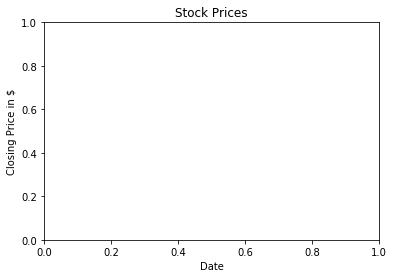

ValueError: view limit minimum -0.9500000000000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [11]:
import sys
import pandas as pd
import datetime as dt
from utils import file_utils
from utils import sqlite_utils
from matplotlib import pyplot as plt 

conn= sqlite_utils._createConnection(r"/var/stockSA/stockPricing.db")

if conn is None: 
    print("Failed to open database connection")
    sys.exit(1)

data= sqlite_utils._findAllStockPricingForStockSymbol(conn, "AAPL")

print(data)

# Adding Title 
plt.title("Stock Prices")
  
# Labeling the axes 
plt.xlabel("Date") 
plt.ylabel("Closing Price in $")
     

    
#xs = [x[0] for x in data]
#ys = [y[1] for y in data]


#plt.autoscale(enable=True, axis='both', tight=None)


# Function to plot  
#plt.plot(xs, ys)


# function to show the plot  
plt.show() 